## Simulate a wc_lang model with wc_sim

### setup Python environment

In [1]:
import os
import tempfile

import matplotlib.pyplot as plt
# allow embedded plots in the notebook
%matplotlib inline

### import Simulation and RunResults

In [2]:
from wc_sim.multialgorithm.simulation import Simulation
from wc_sim.multialgorithm.run_results import RunResults

### select a toy model 

In [3]:
steady_rate_model_filename = os.path.join(os.getcwd(), '../../tests/multialgorithm/fixtures',
                                              '2_species_1_reaction.xlsx')
reactant_rate_model_filename = os.path.join(os.getcwd(), '../../tests/multialgorithm/fixtures',
                              '2_species_1_reaction_with_rates_given_by_reactant_population.xlsx')

### create and run simulation

In [4]:
results_dir = tempfile.mkdtemp()
simulation = Simulation(reactant_rate_model_filename)
num_events, results_dir = simulation.run(end_time=100, results_dir=results_dir, checkpoint_period=10)
run_results = RunResults(results_dir)

Simulated 1652 events
Saved checkpoints and run results in '/tmp/tmp1i5hj5xg/2018-05-28-17-25-24'


/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:1471 PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->bytes,key->values] [items->None]

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:1471 PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->values] [items->None]



In [5]:
print('RunResults contains:', RunResults.COMPONENTS)
for component in ['populations', 'aggregate_states', 'metadata']:
    print(run_results.get(component))

RunResults contains: {'random_states', 'aggregate_states', 'metadata', 'populations'}
       spec_type_1[c]  spec_type_0[c]
0.0               0.0          2000.0
10.0            300.0          1700.0
20.0            555.0          1445.0
30.0            788.0          1212.0
40.0            956.0          1044.0
50.0           1115.0           885.0
60.0           1269.0           731.0
70.0           1383.0           617.0
80.0           1482.0           518.0
90.0           1572.0           428.0
100.0          1642.0           358.0
compartment              c                            
property              name          mass        volume
0.0          compartment c  3.321078e-20  1.000000e-22
10.0         compartment c  3.321078e-20  1.000000e-22
20.0         compartment c  3.321078e-20  1.000000e-22
30.0         compartment c  3.321078e-20  1.000000e-22
40.0         compartment c  3.321078e-20  1.000000e-22
50.0         compartment c  3.321078e-20  1.000000e-22
60.0         compa

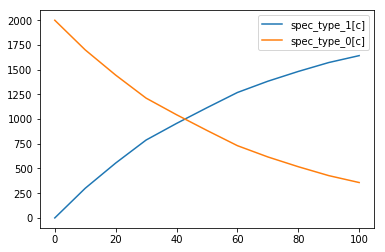

In [6]:
axes = run_results.get('populations').plot()